# Задание 1.2

In [29]:
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [88]:
type(data.mortality)

pandas.core.series.Series

In [53]:
data = pd.read_csv('water.txt', sep = '\t')
std = data['mortality'].std(ddof=1)/sqrt(data.mortality.count())
print std

24.028521714278174

In [54]:
mean = data["mortality"].mean()
print mean

1524.14754098


In [42]:
len(data['mortality'])

61

In [66]:
ans1= _tconfint_generic(mean, std, len(data['mortality']) -1 , 0.05, 'two-sided')
print ans1

(1476.0833413552848, 1572.2117406119285)


In [64]:
x = round(ans1[0], 4)
print(x)

1476.0833


In [96]:
south = data[data['location'] == 'South']["mortality"]

In [97]:
south.count()

26

In [98]:
std1 = south.std(ddof=1)/sqrt(south.count())

In [99]:
mean1 = south.mean()

In [103]:
ans2= _tconfint_generic(mean1, std1, len(south) -1 , 0.05, 'two-sided')
print round(ans2[1], 4)

1433.4636


In [106]:
north = data[data['location'] == 'North']["mortality"]
std2 = north.std(ddof=1)/sqrt(north.count())
mean2 = north.mean()
ans3= _tconfint_generic(mean2, std2, len(north) -1 , 0.05, 'two-sided')
print ans3
print ans2

(1586.5605251961385, 1680.6394748038613)
(1320.1517462936238, 1433.463638321761)


In [110]:
north_h = data[data['location'] == 'North']["hardness"]
std3 = north_h.std(ddof=1)/sqrt(north_h.count())
mean3 = north_h.mean()
ans4= _tconfint_generic(mean3, std3, len(north_h) -1 , 0.05, 'two-sided')
print ans4

north_s = data[data['location'] == 'South']["hardness"]
std4 = north_s.std(ddof=1)/sqrt(north_s.count())
mean4 = north_s.mean()
ans5= _tconfint_generic(mean4, std4, len(north_s) -1 , 0.05, 'two-sided')
print ans5

(21.42248728572426, 39.37751271427574)
(53.467198692036106, 86.07126284642544)


In [104]:
data

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15
7,South,Bournemouth,1299,78
8,North,Bradford,1637,10
9,South,Brighton,1359,84


In [146]:
import scipy.stats as stats
z = stats.norm.ppf(0.4)
print z

-0.2533471031357997


In [147]:
n = z/0.1
n*n

6.418475466730154

# Задание 1.3

In [148]:
from statsmodels.stats.proportion import proportion_confint

In [157]:
normal_interval = proportion_confint(1, 50, method = 'normal')

In [158]:
print 'normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0])

normal_interval [0.000000, 0.058805] with width 0.058805


In [159]:
print round(normal_interval[0], 4)

0.0


In [164]:
normal_mean = 1/50.
print normal_mean

0.02


In [166]:
lower = normal_mean - (normal_interval[1] - normal_mean)
print round(lower,4)

-0.0188


In [167]:
wilson_interval = proportion_confint(1, 51, method = 'wilson')
print 'wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0])

wilson_interval [0.003470, 0.103046] with width 0.099576


In [168]:
print round(wilson_interval[0],4)

0.0035


In [169]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [171]:
n_samples = int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))
n_samples

753

In [181]:
from scipy.stats import norm
z = norm.ppf(0.95)
print z

1.6448536269514722


In [204]:
print n_list[496]
print np.linspace(0,1,1000)[argmax(n_list)]

9604
0.4964964964964965


[0, 39, 77, 116, 154, 192, 230, 268, 306, 343, 381, 419, 456, 494, 531, 569, 606, 643, 680, 717, 754, 791, 828, 865, 901, 938, 974, 1011, 1047, 1083, 1119, 1156, 1192, 1228, 1263, 1299, 1335, 1371, 1406, 1442, 1477, 1512, 1548, 1583, 1618, 1653, 1688, 1723, 1758, 1792, 1827, 1861, 1896, 1930, 1965, 1999, 2033, 2067, 2101, 2135, 2169, 2203, 2237, 2270, 2304, 2337, 2371, 2404, 2437, 2471, 2504, 2537, 2570, 2602, 2635, 2668, 2701, 2733, 2766, 2798, 2830, 2863, 2895, 2927, 2959, 2991, 3023, 3055, 3086, 3118, 3149, 3181, 3212, 3244, 3275, 3306, 3337, 3368, 3399, 3430, 3461, 3492, 3522, 3553, 3583, 3614, 3644, 3674, 3704, 3735, 3765, 3795, 3824, 3854, 3884, 3914, 3943, 3973, 4002, 4031, 4061, 4090, 4119, 4148, 4177, 4206, 4234, 4263, 4292, 4320, 4349, 4377, 4406, 4434, 4462, 4490, 4518, 4546, 4574, 4602, 4629, 4657, 4685, 4712, 4740, 4767, 4794, 4821, 4848, 4875, 4902, 4929, 4956, 4983, 5009, 5036, 5062, 5089, 5115, 5141, 5168, 5194, 5220, 5246, 5272, 5297, 5323, 5349, 5374, 5400, 5425, 5450

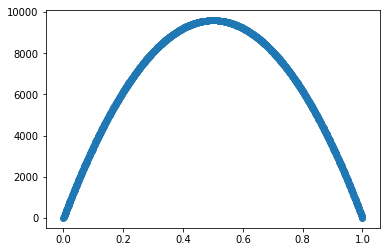

In [198]:
n_list = []
for n in np.linspace(0,1,1000):
    n_samples = int(np.ceil(samplesize_confint_proportion(n, 0.01)))
    n_list.append(n_samples)
print n_list
plt.scatter(np.linspace(0,1,1000), n_list)

# Задание 1.4

In [223]:
print round(norm.ppf(0.0015), 4)

-2.9677


In [221]:
norm.ppf(0.015)

-2.1700903775845606

In [229]:
round(104/11037. - 189/11034.,4)

-0.0077

In [236]:
import scipy

In [237]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [238]:
sample1 = np.array([0]*(11037 - 104) + [1]*104)
sample2 = np.array([0]*(11034 - 189) + [1]*189)

In [239]:
sum(sample1==1)

104

In [243]:
print round(proportions_confint_diff_ind(sample2, sample1, alpha = 0.05)[1], 4)

0.0107


In [259]:
n1 = 104/11037.0
n2 = 189/11034.0

In [260]:
p1 = n1/(1-n1)
print p1

0.00951248513674


In [261]:
p2 = n2/(1-n2)
print p2

0.0174273858921


In [262]:
p2/p1

1.8320539419087138

In [263]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [264]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [290]:
np.random.seed(0)
sample1 = np.array([1]*104 + [0]*(11037 - 104))
sample2 = np.array([1]*189 + [0]*(11034 - 189))

In [291]:
sum(sample2 == 1)

189

In [293]:
def chance_relation(data):
    n = float(sum(data == 1))/len(data)
    p = n/(1-n)
    return p

In [294]:
chance_relation1_scores = map(chance_relation, get_bootstrap_samples(sample1, 1000))
chance_relation2_scores = map(chance_relation, get_bootstrap_samples(sample2, 1000))


In [295]:
x = map(lambda x: x[1]/x[0], zip(chance_relation1_scores, chance_relation2_scores))

In [296]:
print "95% confidence interval",  stat_intervals(x, 0.05)

95% confidence interval [1.44419465 2.34321168]


In [297]:
round(stat_intervals(x, 0.05)[0], 4)

1.4442

# Задание 1.5

In [303]:
n = 100
F_H0 = stats.binom(n, 0.75)

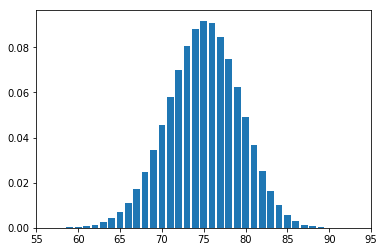

In [308]:
x = np.linspace(0,100,101)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(55, 95)
pylab.show()

In [307]:
len(np.linspace(0,67,68))

68

In [310]:
F_H0.pmf(np.linspace(0,67,68))

array([6.22301528e-61, 1.86690458e-58, 2.77235331e-56, 2.71690624e-54,
       1.97654929e-52, 1.13849239e-50, 5.40783886e-49, 2.17858651e-47,
       7.59782046e-46, 2.32999827e-44, 6.36089529e-43, 1.56131066e-41,
       3.47391622e-40, 7.05472217e-39, 1.31520178e-37, 2.26214706e-36,
       3.60529687e-35, 5.34432242e-34, 7.39297935e-33, 9.57196273e-32,
       1.16299347e-30, 1.32913540e-29, 1.43184131e-28, 1.45674290e-27,
       1.40211504e-26, 1.27872892e-25, 1.10659233e-24, 9.09864808e-24,
       7.11644260e-23, 5.30052277e-22, 3.76337116e-21, 2.54938047e-20,
       1.64913049e-19, 1.01946248e-18, 6.02682233e-18, 3.40945949e-17,
       1.84679056e-16, 9.58334560e-16, 4.76645347e-15, 2.27323165e-14,
       1.04000348e-13, 4.56586894e-13, 1.92418763e-12, 7.78624760e-12,
       3.02601895e-11, 1.12971374e-10, 4.05223408e-10, 1.39672749e-09,
       4.62665981e-09, 1.47297741e-08, 4.50731088e-08, 1.32567967e-07,
       3.74759445e-07, 1.01821434e-06, 2.65867078e-06, 6.67084668e-06,
      

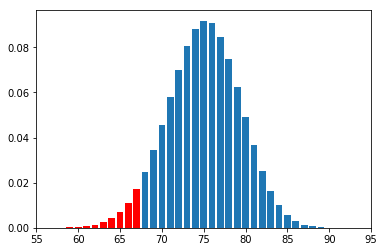

In [311]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(0,67,68), F_H0.pmf(np.linspace(0,67,68)), align = 'center', color='red')
xlim(55, 95) 
pylab.show()

In [398]:
stats.binom_test(67, 100, 0.75)

0.08222258891386608

In [331]:
stats.binom_test(22, 50, 0.75)

3.4831478978300243e-06

In [350]:
import pandas as pd

data = pd.read_csv('pines.txt', header = 0, delimiter = '\t')
data

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4
5,182.5,47.2
6,166.1,48.8
7,160.7,42.1
8,162.9,29.0
9,166.4,33.6


In [353]:
data.values[0]

array([200. ,   8.8])

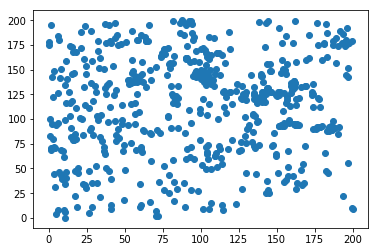

In [354]:
plt.scatter([x[0] for x in data.values], [x[1] for x in data.values])

In [378]:
from scipy import stats
xbin = [0, 40, 80, 120, 160, 200]
ybin = [0, 40, 80, 120, 160, 200]

x = data['sn'].values
y = data['we'].values
z = scipy.stats.binned_statistic_2d(x, y, values= None, statistic  = 'count', bins=[xbin,ybin])
z.statistic

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [368]:
l = 584./25
print l

23.36


In [395]:
new_list = []
for x in z.statistic:
    for y in x:
        new_list.append(float(y))
np.array(new_list)      

array([18., 26., 29., 25., 20., 14., 12., 22., 34., 25., 12., 24., 15.,
       50., 37.,  8., 19., 31., 50.,  7.,  7.,  8., 37., 27., 27.])

In [396]:
stats.chisquare(new_list, ddof = 1)

Power_divergenceResult(statistic=150.58904109589042, pvalue=9.87806178820889e-21)

In [397]:
stats.chisquare(new_list, ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)